In [47]:
import pandas as pd
#import streamlit as st 
#import plotly_express as px
import matplotlib.pyplot as plt
from scipy import stats as st
from scipy.stats import pearsonr
from scipy.stats import f_oneway


In [2]:
#
df = pd.read_csv('vehicles_us.csv')

In [3]:
#Get a column for the manufacturer
df['manufacturer']= df['model'].apply(lambda x: x.split()[0])

In [4]:
#preview the data set
#I see some cars dont have any miles in the odometer, I will to assume those cars are new and have 0 miles.
df.sample(20)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,manufacturer
53,10400,2012.0,chevrolet colorado,excellent,5.0,gas,111871.0,automatic,truck,red,1.0,2019-01-30,27,chevrolet
22305,14950,2013.0,chevrolet silverado 2500hd,excellent,8.0,gas,102762.0,automatic,truck,white,NaN,2018-12-11,11,chevrolet
17532,4249,2006.0,subaru forester,excellent,4.0,gas,129777.0,automatic,wagon,white,1.0,2019-03-09,20,subaru
13557,10900,2007.0,jeep wrangler,excellent,6.0,gas,250000.0,automatic,SUV,red,1.0,2018-12-02,35,jeep
21501,5900,2006.0,nissan murano,excellent,NaN,gas,150838.0,automatic,SUV,black,1.0,2018-08-15,17,nissan
24905,15999,2015.0,chrysler 300,excellent,6.0,gas,65000.0,automatic,sedan,grey,NaN,2018-12-04,24,chrysler
23458,14500,2013.0,ford f-150,excellent,8.0,gas,135300.0,automatic,truck,black,1.0,2019-03-21,8,ford
25012,17026,2013.0,toyota highlander,excellent,6.0,gas,149189.0,automatic,SUV,white,1.0,2018-11-16,43,toyota
31657,13995,2013.0,buick enclave,excellent,6.0,gas,80000.0,automatic,SUV,NaN,1.0,2018-10-24,65,buick
20277,15900,2011.0,gmc sierra 1500,excellent,8.0,gas,157000.0,automatic,truck,NaN,1.0,2018-06-25,77,gmc


In [5]:
df = df.fillna(0)
df.sample(20)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,manufacturer
1321,12999,2013.0,ford edge,excellent,0.0,gas,113918.0,automatic,SUV,black,1.0,2018-05-11,63,ford
8410,5999,2009.0,hyundai santa fe,good,0.0,gas,0.0,automatic,SUV,blue,1.0,2018-06-27,17,hyundai
3195,10000,2014.0,toyota camry,like new,4.0,gas,51.0,automatic,sedan,0,0.0,2018-09-01,18,toyota
28464,11250,2002.0,ford f-150,excellent,8.0,gas,104500.0,automatic,pickup,green,1.0,2018-07-10,56,ford
17488,2900,2006.0,jeep grand cherokee laredo,good,6.0,gas,215777.0,automatic,SUV,green,1.0,2018-12-08,13,jeep
6774,4500,2004.0,ram 1500,good,8.0,gas,0.0,automatic,pickup,black,1.0,2018-09-22,6,ram
36592,13995,2014.0,chevrolet traverse,good,6.0,gas,108014.0,automatic,SUV,blue,1.0,2018-06-28,16,chevrolet
3594,11997,2005.0,jeep wrangler,good,0.0,gas,105687.0,manual,SUV,silver,1.0,2018-09-26,86,jeep
12711,2200,1999.0,nissan maxima,good,6.0,gas,0.0,automatic,sedan,green,0.0,2019-03-03,14,nissan
49074,20362,2019.0,dodge grand caravan,excellent,6.0,gas,31632.0,automatic,mini-van,red,0.0,2019-03-05,54,dodge


In [6]:
#find the average miles per manufacturer
df_avg_miles= df.groupby(['manufacturer'])['odometer'].mean().reset_index(name='avg_miles')
print(df_avg_miles)


     manufacturer      avg_miles
0           acura  121588.343220
1             bmw   96673.827715
2           buick   94619.372694
3        cadillac  101734.152174
4       chevrolet   94868.265385
5        chrysler   92126.119332
6           dodge   95641.809562
7            ford   99151.061632
8             gmc  106990.505887
9           honda  107996.439598
10        hyundai   87531.183291
11           jeep   93896.760439
12            kia   77286.169231
13  mercedes-benz       0.000000
14         nissan   75440.866895
15            ram  103085.651387
16         subaru  103323.750786
17         toyota  108534.294949
18     volkswagen   87134.028769


In [7]:
#find the average price per manufacturer
df_avg_price = df.groupby('manufacturer')['price'].mean().reset_index(name='avg_price')
df_avg_price.head()

,manufacturer,avg_price
0,acura,6474.500000
1,bmw,10695.891386
2,buick,11439.612546
3,cadillac,17032.059006
4,chevrolet,14333.427104


In [8]:
#cost & price by manufacturer
cost_n_price = df_avg_miles.merge(df_avg_price, on=['manufacturer'], how='outer')
print(cost_n_price)

     manufacturer      avg_miles     avg_price
0           acura  121588.343220   6474.500000
1             bmw   96673.827715  10695.891386
2           buick   94619.372694  11439.612546
3        cadillac  101734.152174  17032.059006
4       chevrolet   94868.265385  14333.427104
5        chrysler   92126.119332   8182.738663
6           dodge   95641.809562   8067.058167
7            ford   99151.061632  12697.651989
8             gmc  106990.505887  15602.340622
9           honda  107996.439598   7317.624103
10        hyundai   87531.183291   7256.994885
11           jeep   93896.760439  12774.383420
12            kia   77286.169231   8616.570940
13  mercedes-benz       0.000000  34900.000000
14         nissan   75440.866895   9346.470387
15            ram  103085.651387  18183.618818
16         subaru  103323.750786   8732.718553
17         toyota  108534.294949  10097.875115
18     volkswagen   87134.028769   7257.406214


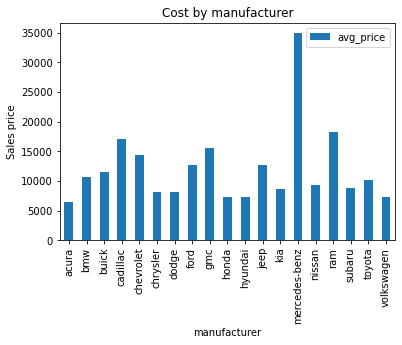

In [21]:
#Visualize the variance in price and miles
#px.scatter(cost_n_price, x=cost_n_price[2], y=cost_n_price[3])
#cost_n_price.plot(x='avg_miles', y='avg_price')


cost_n_price.plot(
    title='Cost by manufacturer',
    x='manufacturer',
    y='avg_price',
    
    ylabel='Sales price',
    kind='bar'
)
#cost_n_price.set_xticklabels(["one", "two", "three", "four"], rotation=45)

plt.show()


<div class='alert alert-info'>
    
The mercedes benz has a much higher average price than the other manufactuers in this for-sale list. 
    
Excluding Cadillac, GMC, Jeep, Chevrolet, and Ram all have a noticably higher selling price.   

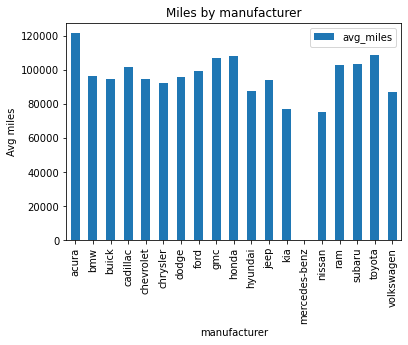

In [24]:
cost_n_price.plot(
    title='Miles by manufacturer',
    x='manufacturer',
    y='avg_miles',
    
    ylabel='Avg miles',
    kind='bar'


)
plt.show()

<div class='alert alert-info'>
Mercedes Benz appears to have no cars for sale that are not brand new.

Additiionally, it appears that the same manufacturers also have cars for sale with a lower average mile. 

Maybe the different in car prices are driven by the amount of miles and not the manufacturer. Before running any tests, we will look at a scatter plot of all of them to look for a visual cue.

In [25]:
#see the relationship of price and cars across all items for sale.
#Most cars seem to have less miles and cost under $50k

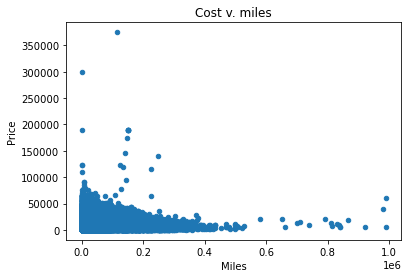

In [16]:
df.plot(title='Cost v. miles', 
        y='price', 
        x='odometer',
        ylabel='Price',
        xlabel='Miles',
        kind='scatter'
       
       )
plt.show()

<div class='alert alert-info'>
There does not appear to be too notable of a correlation between cost and miles. 

In [27]:
print(df['price'].corr(df['odometer']))

-0.3159657190326022


In [48]:
pearsonr(df['price'], df['odometer'])



(-0.3159657190326019, 0.0)

<div class='alert alert-info'>
    
There appears to be a significant relationship between cost and the number of miles. 
      

In [54]:
df_manufacturer_count = df.groupby('manufacturer').count().reset_index()
df_manufacturer_count

,manufacturer,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,acura,236,236,236,236,236,236,236,236,236,236,236,236,236
1,bmw,267,267,267,267,267,267,267,267,267,267,267,267,267
2,buick,271,271,271,271,271,271,271,271,271,271,271,271,271
3,cadillac,322,322,322,322,322,322,322,322,322,322,322,322,322
4,chevrolet,10611,10611,10611,10611,10611,10611,10611,10611,10611,10611,10611,10611,10611
5,chrysler,838,838,838,838,838,838,838,838,838,838,838,838,838
6,dodge,1255,1255,1255,1255,1255,1255,1255,1255,1255,1255,1255,1255,1255
7,ford,12672,12672,12672,12672,12672,12672,12672,12672,12672,12672,12672,12672,12672
8,gmc,2378,2378,2378,2378,2378,2378,2378,2378,2378,2378,2378,2378,2378
9,honda,3485,3485,3485,3485,3485,3485,3485,3485,3485,3485,3485,3485,3485


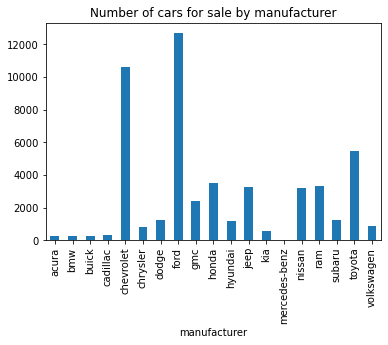

In [59]:
df_manufacturer_count.plot(title='Number of cars for sale by manufacturer',
                           x='manufacturer',
                           y='price',
                           kind='bar',
                           legend=False
                          
                          
                          )

plt.show()

In [64]:
#exploring to see if transmission has an impact on the car costs
df_transmission = df.groupby('transmission')['price'].mean().reset_index(name='avg_price')

df_transmission

,transmission,avg_price
0,automatic,12055.934139
1,manual,9887.836691
2,other,17672.877369


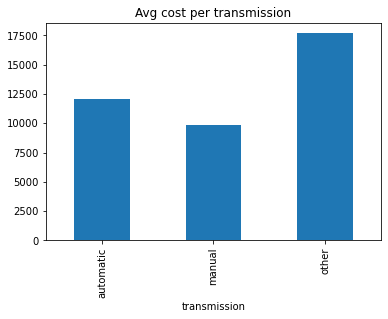

In [68]:
df_transmission.plot(
    title='Avg cost per transmission',
    x='transmission',
    y='avg_price',
    kind='bar',
    legend=False
)
plt.show()

<div class='alert alert-info'>
    
Automatic transmissions apear to cost, on average, significanly more than manual cars. Cars with'other' types of transmissions have a higher average cost than automatic or manual. 


In [71]:
df_tranny = df.groupby('transmission').count().reset_index()
df_tranny

,transmission,price,model_year,model,condition,cylinders,fuel,odometer,type,paint_color,is_4wd,date_posted,days_listed,manufacturer
0,automatic,46902,46902,46902,46902,46902,46902,46902,46902,46902,46902,46902,46902,46902
1,manual,2829,2829,2829,2829,2829,2829,2829,2829,2829,2829,2829,2829,2829
2,other,1794,1794,1794,1794,1794,1794,1794,1794,1794,1794,1794,1794,1794


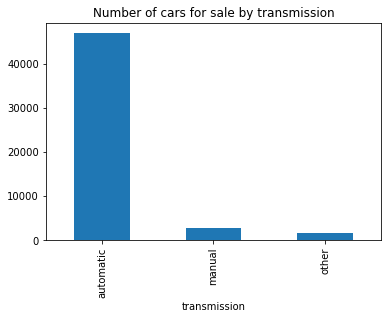

In [76]:
df_tranny.plot(
    title='Number of cars for sale by transmission',
    x='transmission',
    y='price',
    legend=False,
    kind='bar'
)
plt.show()

Because there are so many more automatic cars for sale, the manual and other car types are underrepresented.

In [81]:
df_tranny = df.groupby('transmission')['model_year'].mean().reset_index()
df_tranny

,transmission,model_year
0,automatic,1868.025671
1,manual,1872.152704
2,other,1877.729097


<div class='alert alert-info'>
    
I thought perhaps that the 'other' transmission types could be antique, collectible type of cars, but it appears that they all have a relatively similar model_year.
    

## Conclusion
There is a significantly higher amount of Chevys, Fords, and Toyotas for sale than any of the others. Kia, Acura, BMW, Buic, and Cadillac all have much less cars for sale. 

Of all the cars for sale, having less miles on the car is more likely to be correlated with a higher price. 

While the 'other' transmission types have a higher price than the automatic and manual cars, there is a low representation of 'other' transmission types making conclusions difficult to draw. There would be value in learning what the 'other' data types are. 

Similarly, manual cars have a lower cost than automatic but there is a much lower amount of manual cars represented. There could be a lower desire in users to purchase manual cars, making them have a lower average list price.